In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df_loan=pd.read_csv('loan_prediction.csv')
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_loan.shape

(614, 13)

In [4]:
df_loan.info()
#To check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df_loan['Gender']=df_loan['Gender'].fillna(df_loan['Gender'].mode()[0])
df_loan['Married']=df_loan['Married'].fillna(df_loan['Married'].mode()[0])
df_loan['Dependents']=df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0])
df_loan['Self_Employed']=df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0])
df_loan['LoanAmount']=df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].mean())
df_loan['Loan_Amount_Term']=df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mode()[0])
df_loan['Credit_History']=df_loan['Credit_History'].fillna(df_loan['Credit_History'].mode()[0])
#To fill null values

In [8]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
#Converting string into integer
le = LabelEncoder()
cols = ['Gender', 'Married', 'Dependents','Education','Self_Employed', 'Property_Area', 'Loan_Status']
for col in cols:
    df_loan[col] = le.fit_transform(df_loan[col])

In [18]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [19]:
df_loan.describe()
#Statistical Analysis

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [20]:
df_loan_corr=df_loan.corr()
df_loan_corr
#Apart from Credit_History, all other attributes have weak relationship with Loan_Status

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


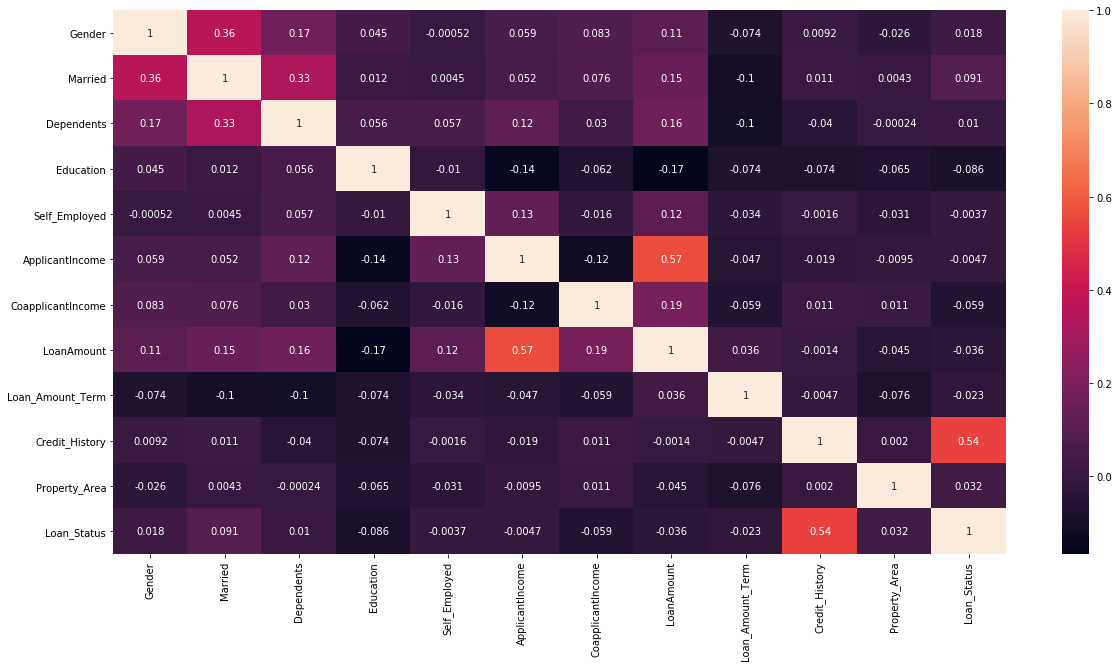

In [21]:
#Correlation between attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df_loan_corr, annot=True)
plt.show()

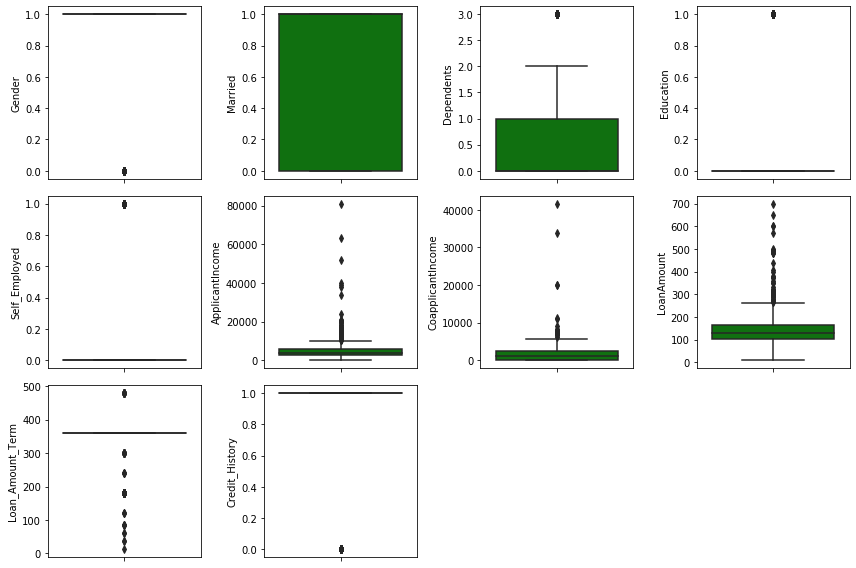

In [25]:
col_list=df_loan.iloc[:,1:11].columns.values
plt.figure(figsize=(12,8))
for i in range(0, len(col_list)):                                      
    plt.subplot(3,4,i+1)
    sns.boxplot(df_loan[col_list[i]], color="green", orient='v')
    plt.tight_layout()
#To check outliers

In [26]:
df_loan1=df_loan.iloc[:,1:11]
from scipy.stats import zscore
z_score=abs(zscore(df_loan1))
print(df_loan.shape)
df_loan1_final=df_loan1.loc[(z_score<3).all(axis=1)]                  
print(df_loan1_final.shape)
#to quantify the outliers

(614, 13)
(577, 10)


In [27]:
df_loan=df_loan[(z_score<3).all(axis=1)]
#To remove the outliers

In [28]:
df_loan.shape

(577, 13)

In [31]:
#Splitting of data
x = df_loan.iloc[:,1:11]
y=df_loan['Loan_Status']

In [32]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [33]:
#Testing the models at random state 42 along with their accuracy score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
#After the testing several models, we have found that LogisticRegression and KNeighborsClassifier is giving highest accuracy score at random state 42.

0.8275862068965517
0.7327586206896551
0.8275862068965517
0.8275862068965517
0.8275862068965517


In [36]:
#Now we are checking, at what random state, LogisticRegression model will have highest accuracy score
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state

print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)
#At random state 91, LogisticRegression model is giving 0.896551724137931 accuracy score

max accuracy score corresponding to  91  is  0.896551724137931


In [37]:
#Now we are checking, at what random state, SVC model will have highest accuracy score
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    svc=SVC()
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state

print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)
#At random state 91, SVC model is giving 0.8879310344827587 accuracy score

max accuracy score corresponding to  91  is  0.8879310344827587


In [38]:
#Now we are checking, at what random state, KNeighborsClassifier model will have highest accuracy score
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state

print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)
#At random state 84, KNeighborsClassifier model is giving 0.8448275862068966 accuracy score

max accuracy score corresponding to  84  is  0.8448275862068966


In [39]:
#Now we are checking, at what random state, GaussianNB model will have highest accuracy score
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    y_pred=gnb.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state

print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)
#At random state 91, GaussianNB model is giving 0.896551724137931 accuracy score

max accuracy score corresponding to  91  is  0.896551724137931


In [40]:
#Cross Validation of LogisticRegression
cross_val_score(LogisticRegression(),x,y,cv=5,scoring='accuracy').mean()
#It is below the accuracy score, so it is acceptable model

0.8163418290854573

In [41]:
#Implementing LogisticRegression model at random state 91
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=91,test_size=0.20)
lr=LogisticRegression()            
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.896551724137931


In [42]:
#Saving the model
import joblib
filename = 'Project12_model.sav'
joblib.dump(lr, filename)

['Project12_model.sav']